# Aula 4 - Análises Avançadas de Ações e Gráficos de Velas



## Criando Gráficos de Candlestick com Matplotlib

Candlestick é um instrumento utilizado na análise gráfica de ativos de renda variável, como ações e minicontratos. Trata-se de um gráfico que representa o preço de um ativo em um determinado período de tempo.  

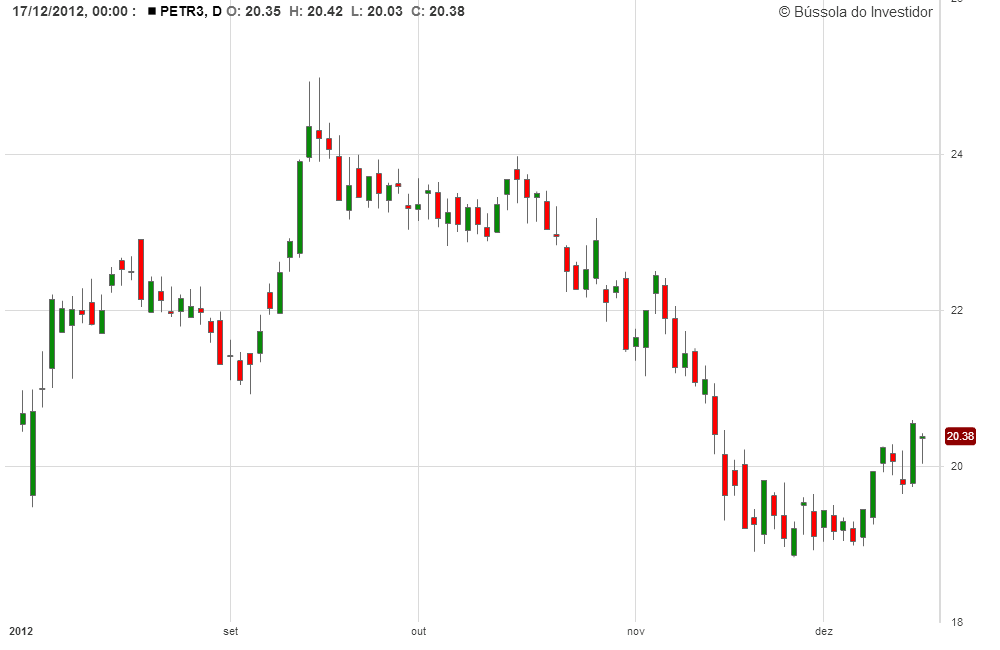

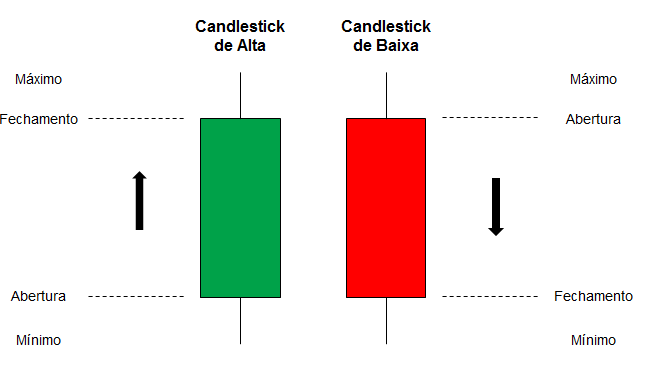

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
#dados = yf.download('PETR3.SA', start='2023-01-01', end='2023-12-31')
dados = yf.download('PETR3.SA', start='2023-01-01', end='2024-03-29')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,26.850000,27.299999,25.959999,26.170000,20.720245,14365400
2023-01-03,26.360001,26.549999,25.480000,25.799999,20.427296,28657500
2023-01-04,25.740000,26.900000,25.299999,26.230000,20.767750,24517300
2023-01-05,26.570000,27.340000,26.450001,27.080000,21.440741,20367800
2023-01-06,27.150000,27.730000,26.820000,26.910000,21.306143,14109900
...,...,...,...,...,...,...
2024-03-22,36.599998,36.959999,36.180000,36.860001,36.860001,8901300
2024-03-25,36.900002,37.540001,36.900002,37.320000,37.320000,8036500
2024-03-26,37.299999,37.439999,36.799999,36.910000,36.910000,8979800


In [4]:
type(dados)

pandas.core.frame.DataFrame

In [5]:
colunas_originais = dados.columns
colunas_originais

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fecha_Ajuste', 'Volume']

In [7]:
dados.head(10)

,Abertura,Maximo,Minimo,Fechamento,Fecha_Ajuste,Volume
Date,,,,,,
2023-01-02,26.850000,27.299999,25.959999,26.170000,20.720245,14365400
2023-01-03,26.360001,26.549999,25.480000,25.799999,20.427296,28657500
2023-01-04,25.740000,26.900000,25.299999,26.230000,20.767750,24517300
2023-01-05,26.570000,27.340000,26.450001,27.080000,21.440741,20367800
2023-01-06,27.150000,27.730000,26.820000,26.910000,21.306143,14109900
2023-01-09,26.840000,27.309999,26.600000,27.090000,21.448662,12703400
2023-01-10,27.070000,27.290001,26.469999,27.250000,21.575342,8949300
2023-01-11,27.250000,27.830000,27.190001,27.600000,21.852455,9587400
2023-01-12,27.690001,27.830000,27.209999,27.750000,21.971218,13092100


In [8]:
dados = dados.rename_axis('Data')
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Fecha_Ajuste,Volume
Data,,,,,,
2023-01-02,26.850000,27.299999,25.959999,26.170000,20.720245,14365400
2023-01-03,26.360001,26.549999,25.480000,25.799999,20.427296,28657500
2023-01-04,25.740000,26.900000,25.299999,26.230000,20.767750,24517300
2023-01-05,26.570000,27.340000,26.450001,27.080000,21.440741,20367800
2023-01-06,27.150000,27.730000,26.820000,26.910000,21.306143,14109900


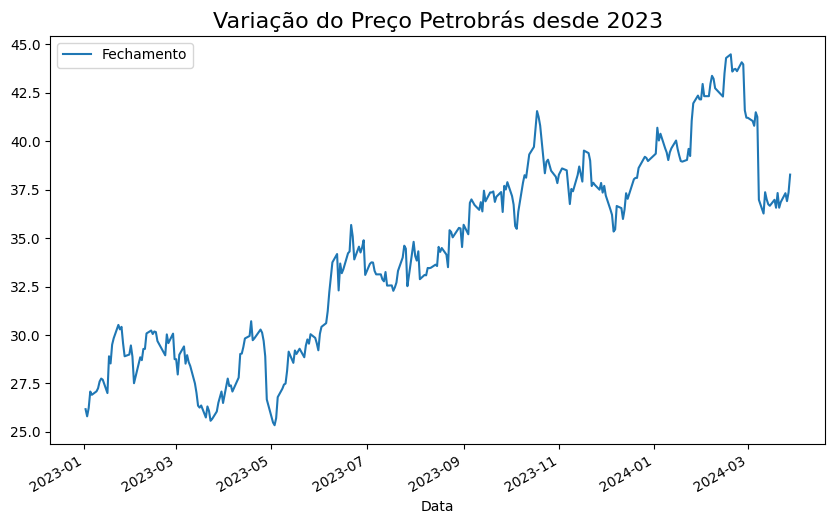

In [9]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do Preço Petrobrás desde 2023', fontsize=16)
plt.legend(['Fechamento'])

In [10]:
df = dados.head(60).copy()

df['Data'] = df.index

df['Data'] = df['Data'].apply(mdates.date2num)

display(df.head())
display(df.tail())

,Abertura,Maximo,Minimo,Fechamento,Fecha_Ajuste,Volume,Data
Data,,,,,,,
2023-01-02,26.850000,27.299999,25.959999,26.170000,20.720245,14365400,19359.0
2023-01-03,26.360001,26.549999,25.480000,25.799999,20.427296,28657500,19360.0
2023-01-04,25.740000,26.900000,25.299999,26.230000,20.767750,24517300,19361.0
2023-01-05,26.570000,27.340000,26.450001,27.080000,21.440741,20367800,19362.0
2023-01-06,27.150000,27.730000,26.820000,26.910000,21.306143,14109900,19363.0


,Abertura,Maximo,Minimo,Fechamento,Fecha_Ajuste,Volume,Data
Data,,,,,,,
2023-03-22,26.32,26.450001,25.950001,26.080000,20.648987,7306500,19438.0
2023-03-23,26.18,26.549999,25.430000,25.570000,20.245192,16280300,19439.0
2023-03-24,25.57,25.940001,25.250000,25.660000,20.316448,11495300,19440.0
2023-03-27,26.00,26.170000,25.610001,26.049999,20.625233,10084900,19443.0
2023-03-28,26.01,26.500000,25.940001,26.500000,20.981524,10928600,19444.0


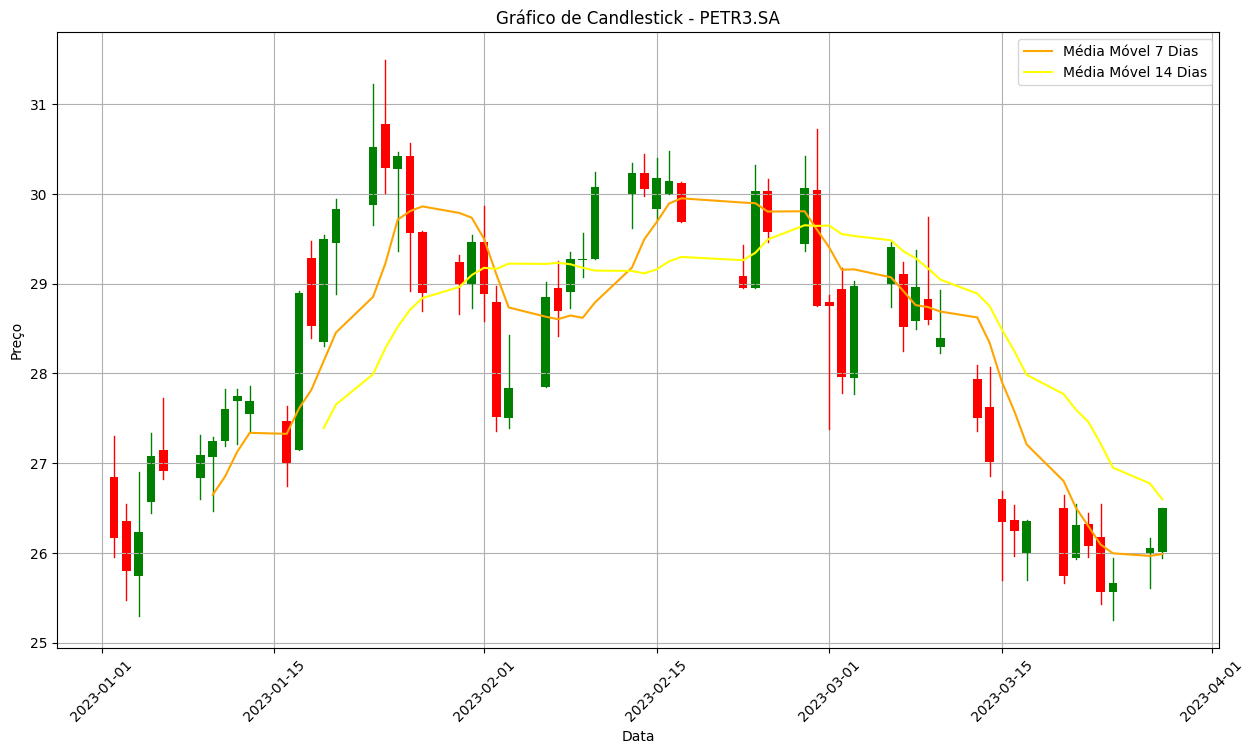

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))

width = 0.7

for i in range(len(df)):
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color = color,
            linewidth=1 )
    
    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color
                               ))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')

ax.legend()

#formatando eixo X
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

#add titulo
plt.title('Gráfico de Candlestick - PETR3.SA')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid("True")

plt.show()

In [12]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

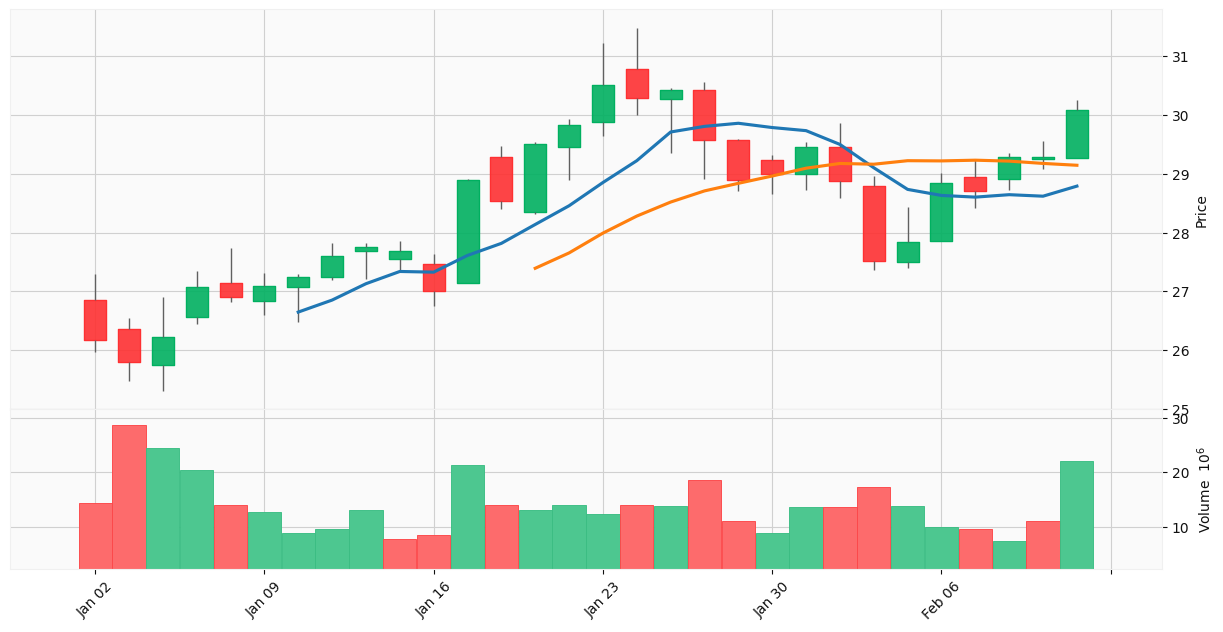

In [14]:
dados.columns = colunas_originais
mpf.plot(dados.head(30), type='candle', figsize=(16,8), volume=True, mav=(7,14), style='yahoo')

[*********************100%%**********************]  1 of 1 completed


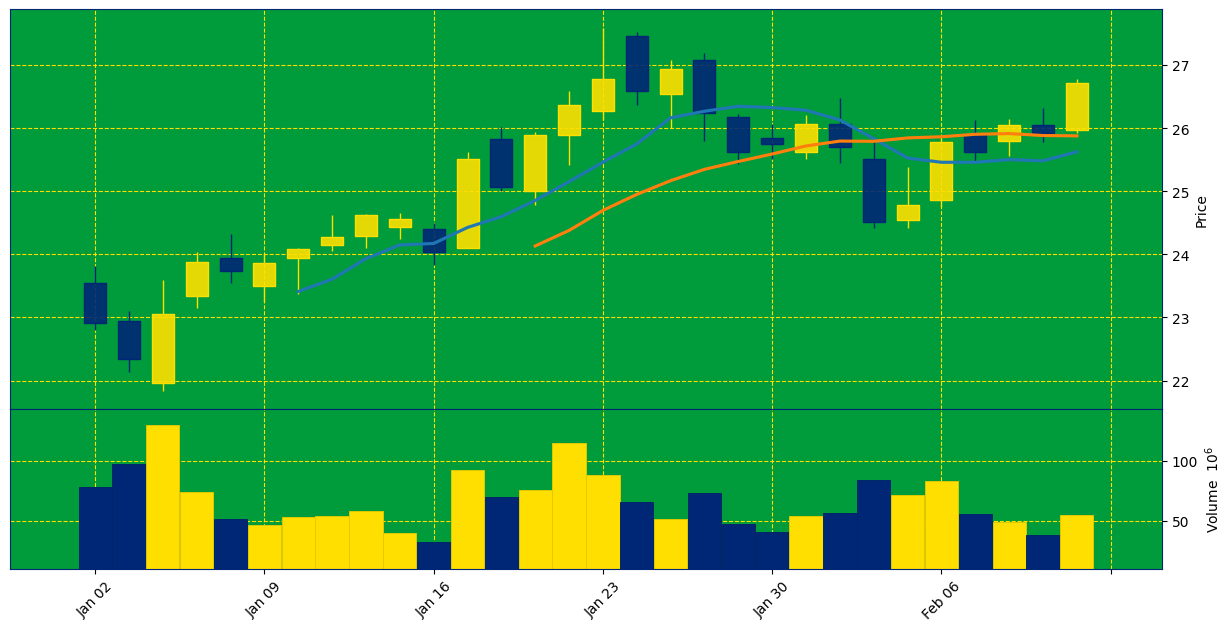

In [15]:
# "API Mágica"
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
mpf.plot(dados.head(30), type='candle', figsize=(16,8), volume=True, mav=(7,14), style='brasil')